### **Deep Learning with CNNs**
we choose <a href="https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist">TMNIST dataset</a> and learn deep learning with CNNs done with tensorflow and keras.<br>
After tuning, find how below factors affect model's accuracy and how quick will to the network plateaus.

### **Import libraries and dataset**

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications import VGG16
import warnings
import warnings
warnings.filterwarnings("ignore")

In [93]:
df=pd.read_csv('TMNIST_Data.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#size of dataframe
print('Total number of rows in datafame',df.shape[0])
print('Total number of columns in datafame',df.shape[1])
#getting total number of unique classes present in the dataframe
num_classes=df['labels'].nunique()
print('Total number of classes are ',num_classes)
#printing all the unique classes
print(df['labels'].unique())
#getting the total number of font types present in the data
num_font=df['names'].nunique()
print('The total number of different type of fonts present are -',num_font)

Total number of rows in datafame 29900
Total number of columns in datafame 786
Total number of classes are  10
[2 8 4 3 1 6 5 9 7 0]
The total number of different type of fonts present are - 2990


In [95]:
X = df.drop(columns=['names','labels'])
y = df[['labels']]

In [96]:
#splitiing the data into test and train
#we are using stratified sampling in order to get same distribution of classes in train and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)

In [97]:
#the pixel values are from 0-255, for neural network models we are squishing them between 0-1 
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

In [98]:
#encoding the y values using one hot encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=  enc.transform(y_test.values.reshape(-1,1))

In [99]:
X_train_norm=X_train.values.reshape(X_train.shape[0],28,28)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28)

### **Baseline**
Basic Neural Network with 3 hidden layers, using Rectified linear unit (ReLU) as activation fucntion and categorical_crossentropy as cost fucntion. We also set epochs to be 20 and using Adam as optimizer. 

In [100]:
#since each pixel is a number between 0-1 we will first start with basic Neural Network
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_100 (Dense)           (None, 512)               401920    
                                                                 
 dense_101 (Dense)           (None, 128)               65664     
                                                                 
 dense_102 (Dense)           (None, 32)                4128      
                                                                 
 dense_103 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [101]:
#fitting the model
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
176/176 - 1s - loss: 0.3188 - accuracy: 0.9180 - val_loss: 0.1319 - val_accuracy: 0.9632 - 1s/epoch - 6ms/step
Epoch 2/20
176/176 - 1s - loss: 0.0959 - accuracy: 0.9753 - val_loss: 0.1226 - val_accuracy: 0.9660 - 539ms/epoch - 3ms/step
Epoch 3/20
176/176 - 1s - loss: 0.0690 - accuracy: 0.9818 - val_loss: 0.0931 - val_accuracy: 0.9742 - 530ms/epoch - 3ms/step
Epoch 4/20
176/176 - 1s - loss: 0.0505 - accuracy: 0.9869 - val_loss: 0.1003 - val_accuracy: 0.9730 - 521ms/epoch - 3ms/step
Epoch 5/20
176/176 - 1s - loss: 0.0400 - accuracy: 0.9896 - val_loss: 0.0786 - val_accuracy: 0.9789 - 541ms/epoch - 3ms/step
Epoch 6/20
176/176 - 1s - loss: 0.0315 - accuracy: 0.9910 - val_loss: 0.0791 - val_accuracy: 0.9785 - 540ms/epoch - 3ms/step
Epoch 7/20
176/176 - 1s - loss: 0.0247 - accuracy: 0.9932 - val_loss: 0.0804 - val_accuracy: 0.9782 - 644ms/epoch - 4ms/step
Epoch 8/20
176/176 - 1s - loss: 0.0240 - accuracy: 0.9930 - val_loss: 0.0772 - val_accuracy: 0.9798 - 562ms/epoch - 3ms/step
Epo

In [102]:
score = model.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"Basic model with CNN Accuracy:{round(score[1],8)*100}%")

Basic model with CNN Accuracy:98.086959%


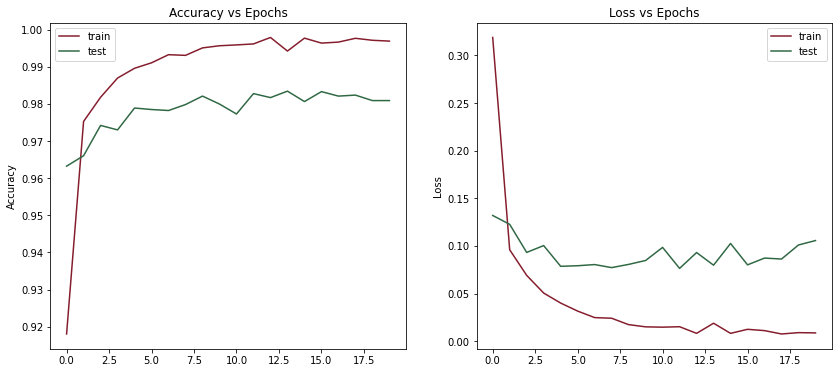

In [103]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

### **How Activation function affect model accuracy**

We change the activation function, observe how does it affect accuracy adn how it affect speed of the network plateaus.<br>
Below we using Rectified linear unit (ReLU),
TanH,
Leaky rectified linear unit (Leaky ReLU),
Parameteric rectified linear unit (PReLU), Randomized leaky rectified linear unit (RReLU),
Exponential linear unit (ELU),
Scaled exponential linear unit (SELU),
S-shaped rectified linear activation unit (SReLU), and 
Adaptive piecewise linear (APL) in experiments.

#### **Rectified linear unit (ReLU)**
Baseline model is using ReLU.
#### **TanH**

In [104]:
#model using TanH as activation function
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(512,activation='tanh'))
model2.add(Dense(128,activation='tanh'))
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_104 (Dense)           (None, 512)               401920    
                                                                 
 dense_105 (Dense)           (None, 128)               65664     
                                                                 
 dense_106 (Dense)           (None, 32)                4128      
                                                                 
 dense_107 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [105]:
#fitting the model
model_history2=model2.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

#### **Leaky rectified linear unit (Leaky ReLU)**

In [106]:
#model using LeakyReLU as activation function
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(512,activation='LeakyReLU'))
model3.add(Dense(128,activation='LeakyReLU'))
model3.add(Dense(32, activation='LeakyReLU'))
model3.add(Dense(num_classes, activation='softmax'))
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 784)               0         
                                                                 
 dense_108 (Dense)           (None, 512)               401920    
                                                                 
 dense_109 (Dense)           (None, 128)               65664     
                                                                 
 dense_110 (Dense)           (None, 32)                4128      
                                                                 
 dense_111 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [107]:
#fitting the model
model_history3=model3.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

#### **Exponential linear unit (ELU)**

In [108]:
#model using ELU as activation function
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(512,activation='ELU'))
model4.add(Dense(128,activation='ELU'))
model4.add(Dense(32, activation='ELU'))
model4.add(Dense(num_classes, activation='softmax'))
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_112 (Dense)           (None, 512)               401920    
                                                                 
 dense_113 (Dense)           (None, 128)               65664     
                                                                 
 dense_114 (Dense)           (None, 32)                4128      
                                                                 
 dense_115 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [109]:
#fitting the model
model_history4=model4.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

#### **Scaled exponential linear unit (SELU)**

In [110]:

#model using SELU as activation function
model5 = Sequential()
model5.add(Flatten(input_shape=(28,28)))
model5.add(Dense(512,activation='selu'))
model5.add(Dense(128,activation='selu'))
model5.add(Dense(32, activation='selu'))
model5.add(Dense(num_classes, activation='softmax'))
model5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 784)               0         
                                                                 
 dense_116 (Dense)           (None, 512)               401920    
                                                                 
 dense_117 (Dense)           (None, 128)               65664     
                                                                 
 dense_118 (Dense)           (None, 32)                4128      
                                                                 
 dense_119 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [111]:
#fitting the model
model_history5=model5.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

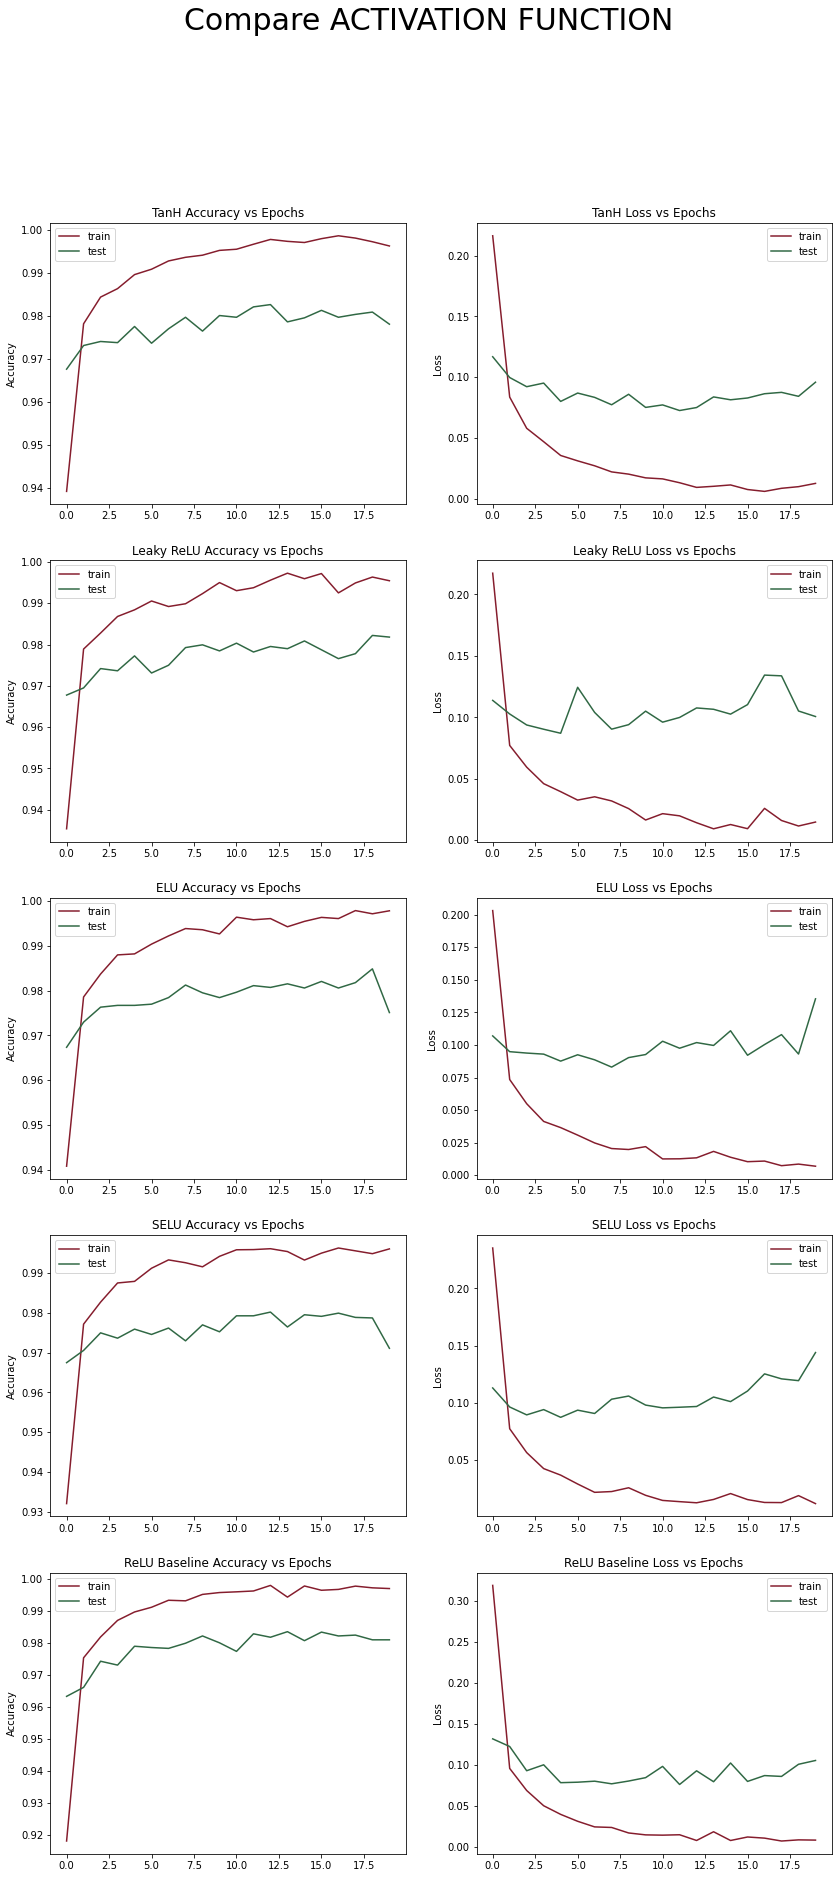

In [112]:
plt.figure(figsize=(14, 30))
plt.suptitle('Compare ACTIVATION FUNCTION', fontsize=30)
plt.subplot(5,2,1)
epochs=np.arange(20)
plt.title('TanH Accuracy vs Epochs')
plt.plot(epochs,model_history2.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history2.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(5,2,2)
plt.title('TanH Loss vs Epochs')
plt.plot(epochs,model_history2.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history2.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(5,2,3)
plt.title('Leaky ReLU Accuracy vs Epochs')
plt.plot(epochs,model_history3.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history3.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(5,2,4)
plt.title('Leaky ReLU Loss vs Epochs')
plt.plot(epochs,model_history3.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history3.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(5,2,5)
plt.title('ELU Accuracy vs Epochs')
plt.plot(epochs,model_history4.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history4.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(5,2,6)
plt.title('ELU Loss vs Epochs')
plt.plot(epochs,model_history4.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history4.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(5,2,7)
plt.title('SELU Accuracy vs Epochs')
plt.plot(epochs,model_history5.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history5.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(5,2,8)
plt.title('SELU Loss vs Epochs')
plt.plot(epochs,model_history5.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history5.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(5,2,9)
plt.title('ReLU Baseline Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(5,2,10)
plt.title('ReLU Baseline Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

In [113]:
score2 = model2.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"CNNmodel using TanH Accuracy:{round(score2[1],8)*100}%")
score3 = model3.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"CNNmodel using LeakyReLU Accuracy:{round(score3[1],8)*100}%")
score4 = model4.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"CNNmodel using ELU Accuracy:{round(score4[1],8)*100}%")
score5 = model5.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"CNNmodel using SELU Accuracy:{round(score5[1],8)*100}%")
score = model.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"CNNmodel using ReLU baseline Accuracy:{round(score[1],8)*100}%")

CNNmodel using TanH Accuracy:97.806019%
CNNmodel using LeakyReLU Accuracy:98.180604%
CNNmodel using ELU Accuracy:97.51170300000001%
CNNmodel using SELU Accuracy:97.110367%
CNNmodel using ReLU baseline Accuracy:98.086959%


We can found that LeakyReLU activation fucntion make the model's accuracy slightly outperform than others which may even reach 98.4% accuracy. And we can see, from that loss plots, loss decrease sharly even after 1 epoch and perform small fluctuation in latter epochs. modified the activation didn't affect how quickly the network plateaus or has influence faintly to it.
### **How cost function affect model**

We use Quadratic cost (mean-square error),
Cross-Entropy,
Hinge,
Kullback–Leibler divergence,
Cosine Proximity in follow experiments.
#### **Cross-Entropy**
This loss function has been used in our baseline model
#### **Kullback–Leibler divergence**

In [114]:
#we change loss fucntion to Kullback–Leibler divergence(Probabilistic losses)
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(512,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(optimizer=opt, loss='kl_divergence', metrics=['accuracy'])
model2.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 784)               0         
                                                                 
 dense_120 (Dense)           (None, 512)               401920    
                                                                 
 dense_121 (Dense)           (None, 128)               65664     
                                                                 
 dense_122 (Dense)           (None, 32)                4128      
                                                                 
 dense_123 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [115]:
#fitting the model
model_history2=model2.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

#### **Quadratic cost (mean-square error)**




In [116]:
#we change loss fucntion to Quadratic cost (mean-square error)(Regression losses)
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(512,activation='relu'))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))
model3.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
model3.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_31 (Flatten)        (None, 784)               0         
                                                                 
 dense_124 (Dense)           (None, 512)               401920    
                                                                 
 dense_125 (Dense)           (None, 128)               65664     
                                                                 
 dense_126 (Dense)           (None, 32)                4128      
                                                                 
 dense_127 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [117]:
#fitting the model
model_history3=model3.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

#### **Hinge**

In [118]:
#we change loss fucntion to Hinge (Hinge losses)
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(512,activation='relu'))
model4.add(Dense(128,activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))
model4.compile(optimizer=opt, loss='hinge', metrics=['accuracy'])
model4.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 784)               0         
                                                                 
 dense_128 (Dense)           (None, 512)               401920    
                                                                 
 dense_129 (Dense)           (None, 128)               65664     
                                                                 
 dense_130 (Dense)           (None, 32)                4128      
                                                                 
 dense_131 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [119]:
#fitting the model
model_history4=model4.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

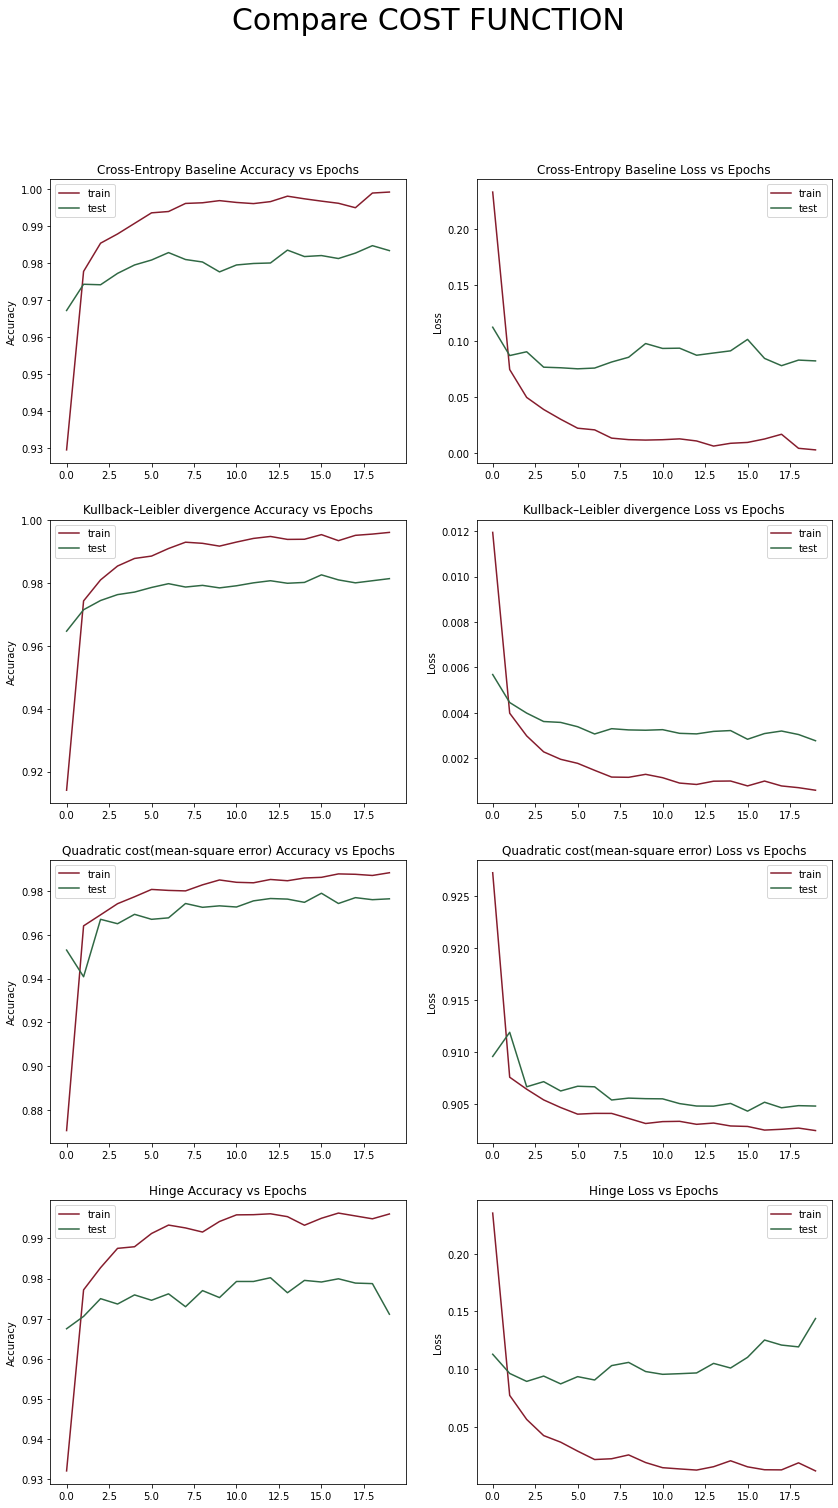

In [120]:
plt.figure(figsize=(14, 24))
plt.suptitle('Compare COST FUNCTION', fontsize=30)
plt.subplot(4,2,1)
epochs=np.arange(20)
plt.title('Cross-Entropy Baseline Accuracy vs Epochs')
plt.plot(epochs,model_history2.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history2.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,2)
plt.title('Cross-Entropy Baseline Loss vs Epochs')
plt.plot(epochs,model_history2.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history2.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,3)
plt.title('Kullback–Leibler divergence Accuracy vs Epochs')
plt.plot(epochs,model_history3.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history3.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,4)
plt.title('Kullback–Leibler divergence Loss vs Epochs')
plt.plot(epochs,model_history3.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history3.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,5)
plt.title('Quadratic cost(mean-square error) Accuracy vs Epochs')
plt.plot(epochs,model_history4.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history4.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,6)
plt.title('Quadratic cost(mean-square error) Loss vs Epochs')
plt.plot(epochs,model_history4.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history4.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,7)
plt.title('Hinge Accuracy vs Epochs')
plt.plot(epochs,model_history5.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history5.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,8)
plt.title('Hinge Loss vs Epochs')
plt.plot(epochs,model_history5.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history5.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

In [122]:
score2 = model2.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"Loss function Cross-Entropy Baseline Accuracy:{round(score2[1],8)*100}%")
score3 = model3.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"Kullback–Leibler divergence Accuracy:{round(score3[1],8)*100}%")
score4 = model4.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"mean-square error Accuracy:{round(score4[1],8)*100}%")
score = model.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"Hinge baseline Accuracy:{round(score[1],8)*100}%")

Loss function Cross-Entropy Baseline Accuracy:98.341137%
Kullback–Leibler divergence Accuracy:98.140466%
mean-square error Accuracy:97.645485%
Hinge baseline Accuracy:98.086959%


After make experiments with different cost function, i found that the model with Quadratic cost (mean-square error) loss function can decrease to a really small loss like 0.004 after 1 epoch which is way more faster than others. And the model with Hinge loss function slow down decreasing speed dramatically in early 7th epochs. Here we assumed the Hinge loss function may play a role in this model to affect plateaus. In this dataset, model with cross-entrophy loss function has a accuracy 98.34% which is slightly better than others.
### How epochs affect CNN model

Later we try modify epochs into 50,10 to observe their effect on accuracy and network plateaus.

#### **50 epochs**

In [123]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(512,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_33 (Flatten)        (None, 784)               0         
                                                                 
 dense_132 (Dense)           (None, 512)               401920    
                                                                 
 dense_133 (Dense)           (None, 128)               65664     
                                                                 
 dense_134 (Dense)           (None, 32)                4128      
                                                                 
 dense_135 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [124]:
#fitting the model with 50 epochs
model_history2=model2.fit(X_train_norm, y_train_encoded, epochs=50, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

#### **10 epochs**

In [125]:
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(512,activation='relu'))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_34 (Flatten)        (None, 784)               0         
                                                                 
 dense_136 (Dense)           (None, 512)               401920    
                                                                 
 dense_137 (Dense)           (None, 128)               65664     
                                                                 
 dense_138 (Dense)           (None, 32)                4128      
                                                                 
 dense_139 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [126]:
#fitting the model with 10 epochs
model_history3=model3.fit(X_train_norm, y_train_encoded, epochs=10, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/10
176/176 - 1s - loss: 0.2182 - accuracy: 0.9369 - val_loss: 0.1028 - val_accuracy: 0.9696 - 1s/epoch - 8ms/step
Epoch 2/10
176/176 - 1s - loss: 0.0689 - accuracy: 0.9809 - val_loss: 0.0874 - val_accuracy: 0.9761 - 536ms/epoch - 3ms/step
Epoch 3/10
176/176 - 1s - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0753 - val_accuracy: 0.9785 - 542ms/epoch - 3ms/step
Epoch 4/10
176/176 - 1s - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0808 - val_accuracy: 0.9783 - 530ms/epoch - 3ms/step
Epoch 5/10
176/176 - 1s - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0814 - val_accuracy: 0.9790 - 537ms/epoch - 3ms/step
Epoch 6/10
176/176 - 1s - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0737 - val_accuracy: 0.9801 - 530ms/epoch - 3ms/step
Epoch 7/10
176/176 - 1s - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.1037 - val_accuracy: 0.9761 - 545ms/epoch - 3ms/step
Epoch 8/10
176/176 - 1s - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0813 - val_accuracy: 0.9802 - 532ms/epoch - 3ms/step
Epo

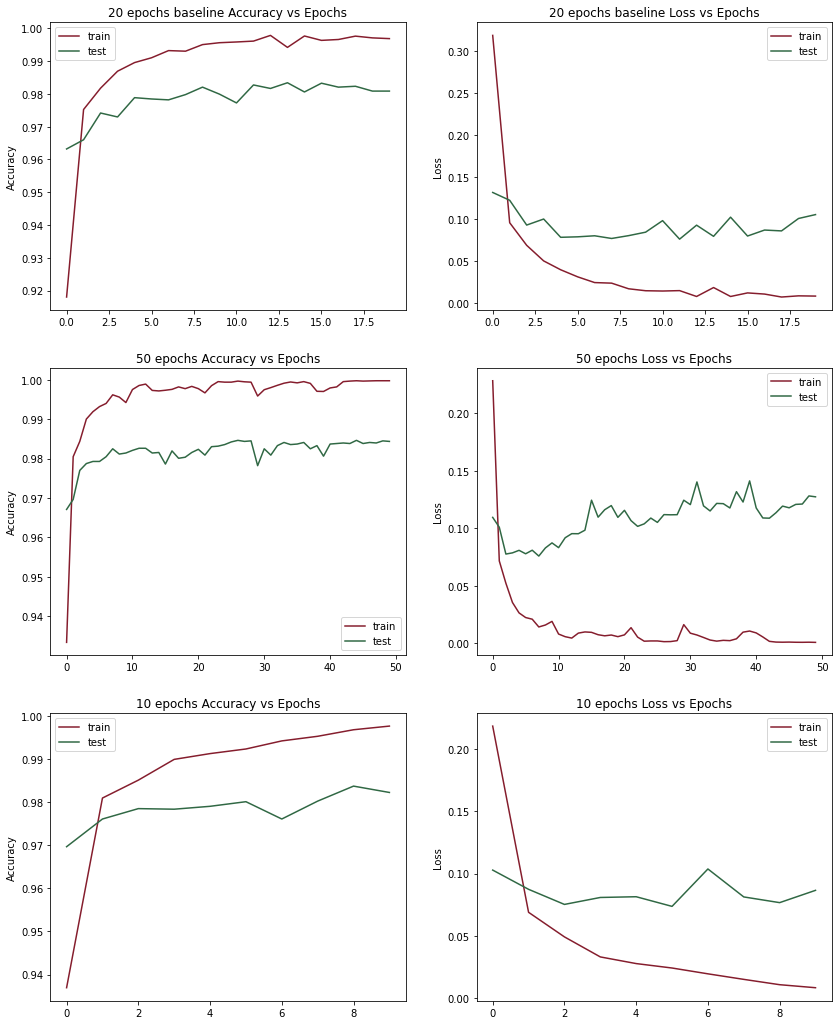

In [129]:
plt.figure(figsize=(14, 18))
plt.subplot(3,2,1)
epochs=np.arange(20)
plt.title('20 epochs baseline Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(3,2,2)
plt.title('20 epochs baseline Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test', color='#306844')
plt.legend()

plt.subplot(3,2,3)
epochs=np.arange(50)
plt.title('50 epochs Accuracy vs Epochs')
plt.plot(epochs,model_history2.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history2.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(3,2,4)
plt.title('50 epochs Loss vs Epochs')
plt.plot(epochs,model_history2.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history2.history['val_loss'],label='test', color='#306844')
plt.legend()

plt.subplot(3,2,5)
epochs=np.arange(10)
plt.title('10 epochs Accuracy vs Epochs')
plt.plot(epochs,model_history3.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history3.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(3,2,6)
plt.title('10 epochs Loss vs Epochs')
plt.plot(epochs,model_history3.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history3.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

In [130]:
score = model.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"20 epochs Baseline Accuracy:{round(score[1],8)*100}%")
score2 = model2.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"50 epochs Accuracy:{round(score2[1],8)*100}%")
score3 = model3.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"10 epochs Accuracy:{round(score3[1],8)*100}%")

20 epochs Baseline Accuracy:98.086959%
50 epochs Accuracy:98.434782%
10 epochs Accuracy:98.220736%


In above plots, we can find that 10,20 and 50 epochs are all decrease loss sharply in first epoch, and dramaticly slow down and has small fluctuation in 8th epochs. numbers of epochs does not affect how quickly plateaus. After 50 epochs, model has highest accuracy among these three models.
### **How GRADIENT ESTIMATION affect CNN model**
Change the gradient estimation to Stochastic Gradient Descent,
Adagrad,
RMSProp,
ADAM separately and observe their affect on accuracy.

#### **Stochastic Gradient Descent**

In [131]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(512,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
opt1=SGD()
model2.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_35 (Flatten)        (None, 784)               0         
                                                                 
 dense_140 (Dense)           (None, 512)               401920    
                                                                 
 dense_141 (Dense)           (None, 128)               65664     
                                                                 
 dense_142 (Dense)           (None, 32)                4128      
                                                                 
 dense_143 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [132]:
#fitting the model
model_history2=model2.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
176/176 - 1s - loss: 1.6511 - accuracy: 0.5957 - val_loss: 0.9817 - val_accuracy: 0.8657 - 1s/epoch - 6ms/step
Epoch 2/20
176/176 - 1s - loss: 0.6548 - accuracy: 0.8945 - val_loss: 0.4616 - val_accuracy: 0.9117 - 521ms/epoch - 3ms/step
Epoch 3/20
176/176 - 1s - loss: 0.3786 - accuracy: 0.9229 - val_loss: 0.3276 - val_accuracy: 0.9252 - 529ms/epoch - 3ms/step
Epoch 4/20
176/176 - 1s - loss: 0.2892 - accuracy: 0.9342 - val_loss: 0.2719 - val_accuracy: 0.9315 - 517ms/epoch - 3ms/step
Epoch 5/20
176/176 - 1s - loss: 0.2442 - accuracy: 0.9414 - val_loss: 0.2394 - val_accuracy: 0.9371 - 519ms/epoch - 3ms/step
Epoch 6/20
176/176 - 1s - loss: 0.2174 - accuracy: 0.9464 - val_loss: 0.2192 - val_accuracy: 0.9431 - 527ms/epoch - 3ms/step
Epoch 7/20
176/176 - 1s - loss: 0.1983 - accuracy: 0.9502 - val_loss: 0.2032 - val_accuracy: 0.9438 - 525ms/epoch - 3ms/step
Epoch 8/20
176/176 - 1s - loss: 0.1843 - accuracy: 0.9534 - val_loss: 0.1970 - val_accuracy: 0.9484 - 521ms/epoch - 3ms/step
Epo

#### **Adagrad**

In [133]:
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(512,activation='relu'))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))
opt2=Adagrad()
model3.compile(optimizer=opt2, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_36 (Flatten)        (None, 784)               0         
                                                                 
 dense_144 (Dense)           (None, 512)               401920    
                                                                 
 dense_145 (Dense)           (None, 128)               65664     
                                                                 
 dense_146 (Dense)           (None, 32)                4128      
                                                                 
 dense_147 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [134]:
#fitting the model
model_history3=model3.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

#### **RMSprop**

In [135]:
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(512,activation='relu'))
model4.add(Dense(128,activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))
opt3=RMSprop()
model4.compile(optimizer=opt3, loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_37 (Flatten)        (None, 784)               0         
                                                                 
 dense_148 (Dense)           (None, 512)               401920    
                                                                 
 dense_149 (Dense)           (None, 128)               65664     
                                                                 
 dense_150 (Dense)           (None, 32)                4128      
                                                                 
 dense_151 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [136]:
#fitting the model
model_history4=model4.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

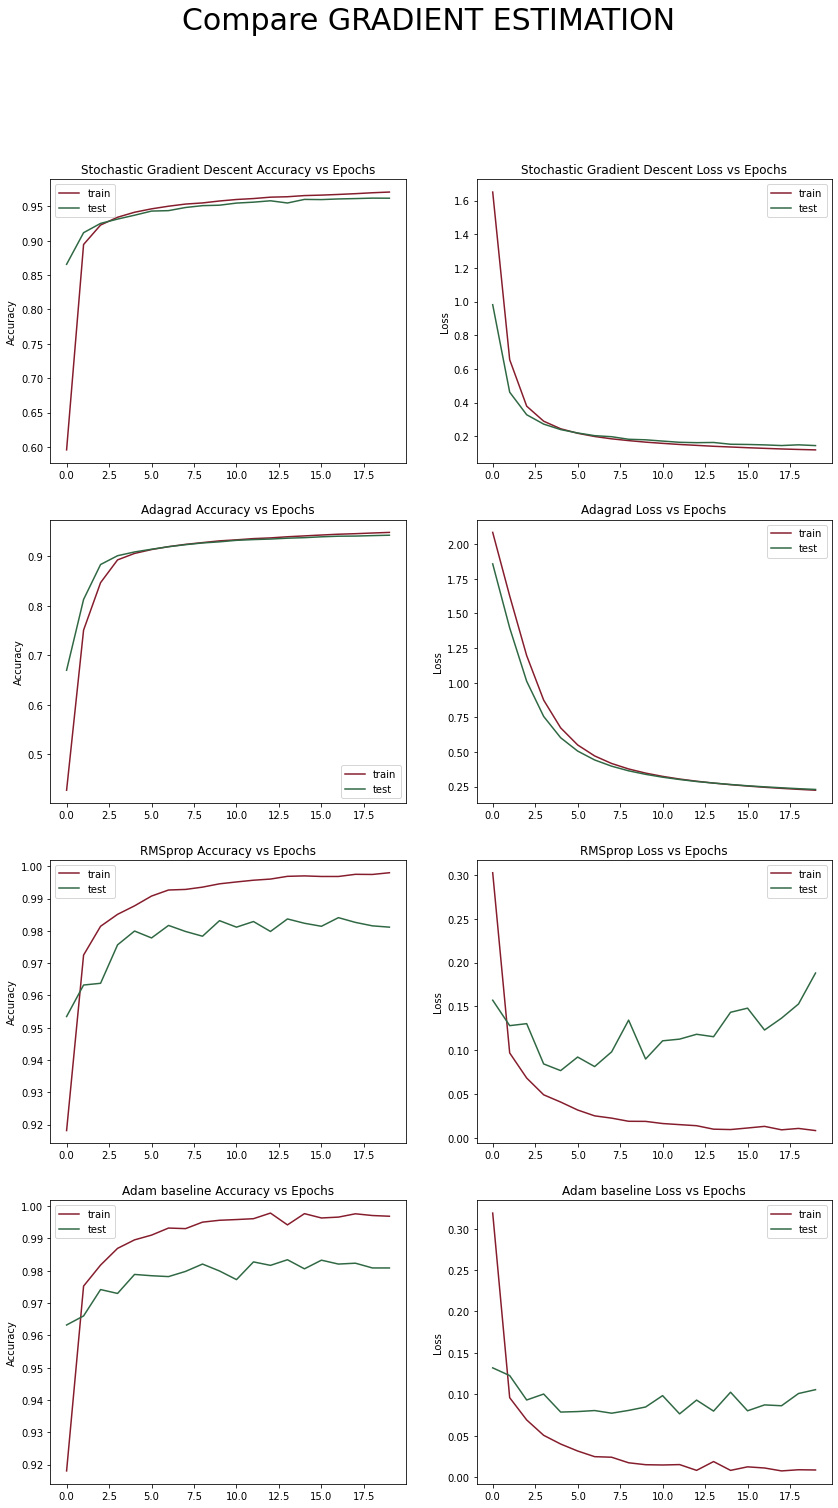

In [138]:
plt.figure(figsize=(14, 24))
plt.suptitle('Compare GRADIENT ESTIMATION', fontsize=30)
plt.subplot(4,2,1)
epochs=np.arange(20)
plt.title('Stochastic Gradient Descent Accuracy vs Epochs')
plt.plot(epochs,model_history2.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history2.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,2)
plt.title('Stochastic Gradient Descent Loss vs Epochs')
plt.plot(epochs,model_history2.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history2.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,3)
plt.title('Adagrad Accuracy vs Epochs')
plt.plot(epochs,model_history3.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history3.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,4)
plt.title('Adagrad Loss vs Epochs')
plt.plot(epochs,model_history3.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history3.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,5)
plt.title('RMSprop Accuracy vs Epochs')
plt.plot(epochs,model_history4.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history4.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,6)
plt.title('RMSprop Loss vs Epochs')
plt.plot(epochs,model_history4.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history4.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,7)
plt.title('Adam baseline Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,8)
plt.title('Adam baseline Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

In [139]:
score = model.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"Adam Baseline Accuracy:{round(score[1],8)*100}%")
score2 = model2.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"SGD Accuracy:{round(score2[1],8)*100}%")
score3 = model3.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"Adagrad Accuracy:{round(score3[1],8)*100}%")
score4 = model4.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"RMSprop Accuracy:{round(score4[1],8)*100}%")

Adam Baseline Accuracy:98.086959%
SGD Accuracy:96.187294%
Adagrad Accuracy:94.30100300000001%
RMSprop Accuracy:98.11371%


For this dataset, model with RMSprop gradient estimation has highest accuracy 98.11%. With modifying gradient estimation, model's accuracy performance are slightly different. And SGD seems affect model more quickly has network plateaus after 5 epochs.

### **How NETWORK ARCHITECTURE affect CNN model**

#### **Using Convolutional Neural Network with 2 conv2d and maxpool layers**

In [141]:
model2 = Sequential()
model2.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_38 (Flatten)        (None, 1600)              0         
                                                                 
 dense_152 (Dense)           (None, 512)             

In [142]:
#fitting the model
model_history2=model2.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

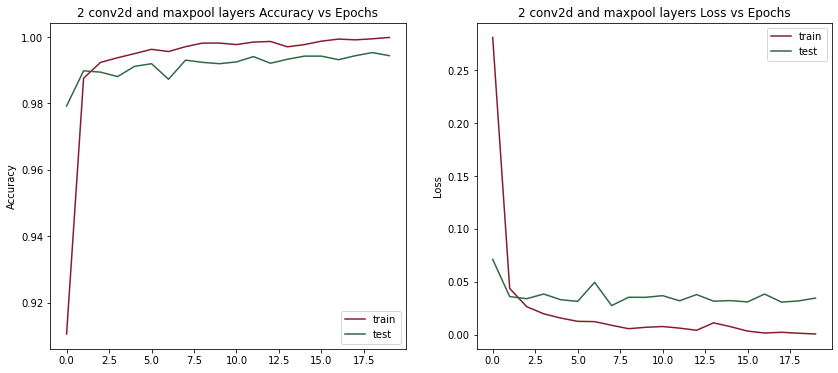

In [143]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('2 conv2d and maxpool layers Accuracy vs Epochs')
plt.plot(epochs,model_history2.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history2.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('2 conv2d and maxpool layers Loss vs Epochs')
plt.plot(epochs,model_history2.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history2.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

In [144]:
score2 = model2.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"2 conv2d&maxpool layers Accuracy:{round(score2[1],8)*100}%")

2 conv2d&maxpool layers Accuracy:99.438125%


Compare with baseline model, model with 2 conv2d and maxpool layers shows network plateaus in early 5 or 4 epochs, it also converge loss to about 0.05 only after 1 epoch. Meanwhile, this model also shows a accuracy higher than 99%. Then, The network architecture can affect model's accuracy performance and speed to plateaus.
### **How NETWORK INITIALIZATION affect CNN model**
Zeros,
RandomUniform,
GlorotNormal,
GlorotUniform

#### **GlorotNormal**

In [145]:
initializer = GlorotNormal()
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(512,activation='relu',kernel_initializer=initializer))
model2.add(Dense(128,activation='relu',kernel_initializer=initializer))
model2.add(Dense(32, activation='relu',kernel_initializer=initializer))
model2.add(Dense(num_classes, activation='softmax',kernel_initializer=initializer))
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_39 (Flatten)        (None, 784)               0         
                                                                 
 dense_156 (Dense)           (None, 512)               401920    
                                                                 
 dense_157 (Dense)           (None, 128)               65664     
                                                                 
 dense_158 (Dense)           (None, 32)                4128      
                                                                 
 dense_159 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [146]:
#fitting the model
model_history2=model2.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

#### **Zeros**

In [147]:
initializer = Zeros()
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(512,activation='relu',kernel_initializer=initializer))
model3.add(Dense(128,activation='relu',kernel_initializer=initializer))
model3.add(Dense(32, activation='relu',kernel_initializer=initializer))
model3.add(Dense(num_classes, activation='softmax',kernel_initializer=initializer))
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_40 (Flatten)        (None, 784)               0         
                                                                 
 dense_160 (Dense)           (None, 512)               401920    
                                                                 
 dense_161 (Dense)           (None, 128)               65664     
                                                                 
 dense_162 (Dense)           (None, 32)                4128      
                                                                 
 dense_163 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [148]:
#fitting the model
model_history3=model3.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

#### **RandomUniform**

In [149]:

initializer = RandomUniform(minval=0., maxval=1.)
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(512,activation='relu',kernel_initializer=initializer))
model4.add(Dense(128,activation='relu',kernel_initializer=initializer))
model4.add(Dense(32, activation='relu',kernel_initializer=initializer))
model4.add(Dense(num_classes, activation='softmax',kernel_initializer=initializer))
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_41 (Flatten)        (None, 784)               0         
                                                                 
 dense_164 (Dense)           (None, 512)               401920    
                                                                 
 dense_165 (Dense)           (None, 128)               65664     
                                                                 
 dense_166 (Dense)           (None, 32)                4128      
                                                                 
 dense_167 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [150]:
#fitting the model
model_history4=model4.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

#### **GlorotUniform**

In [151]:

initializer = GlorotUniform()
model5 = Sequential()
model5.add(Flatten(input_shape=(28,28)))
model5.add(Dense(512,activation='relu',kernel_initializer=initializer))
model5.add(Dense(128,activation='relu',kernel_initializer=initializer))
model5.add(Dense(32, activation='relu',kernel_initializer=initializer))
model5.add(Dense(num_classes, activation='softmax',kernel_initializer=initializer))
model5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_42 (Flatten)        (None, 784)               0         
                                                                 
 dense_168 (Dense)           (None, 512)               401920    
                                                                 
 dense_169 (Dense)           (None, 128)               65664     
                                                                 
 dense_170 (Dense)           (None, 32)                4128      
                                                                 
 dense_171 (Dense)           (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [152]:
#fitting the model
model_history5=model5.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=0,batch_size=128)

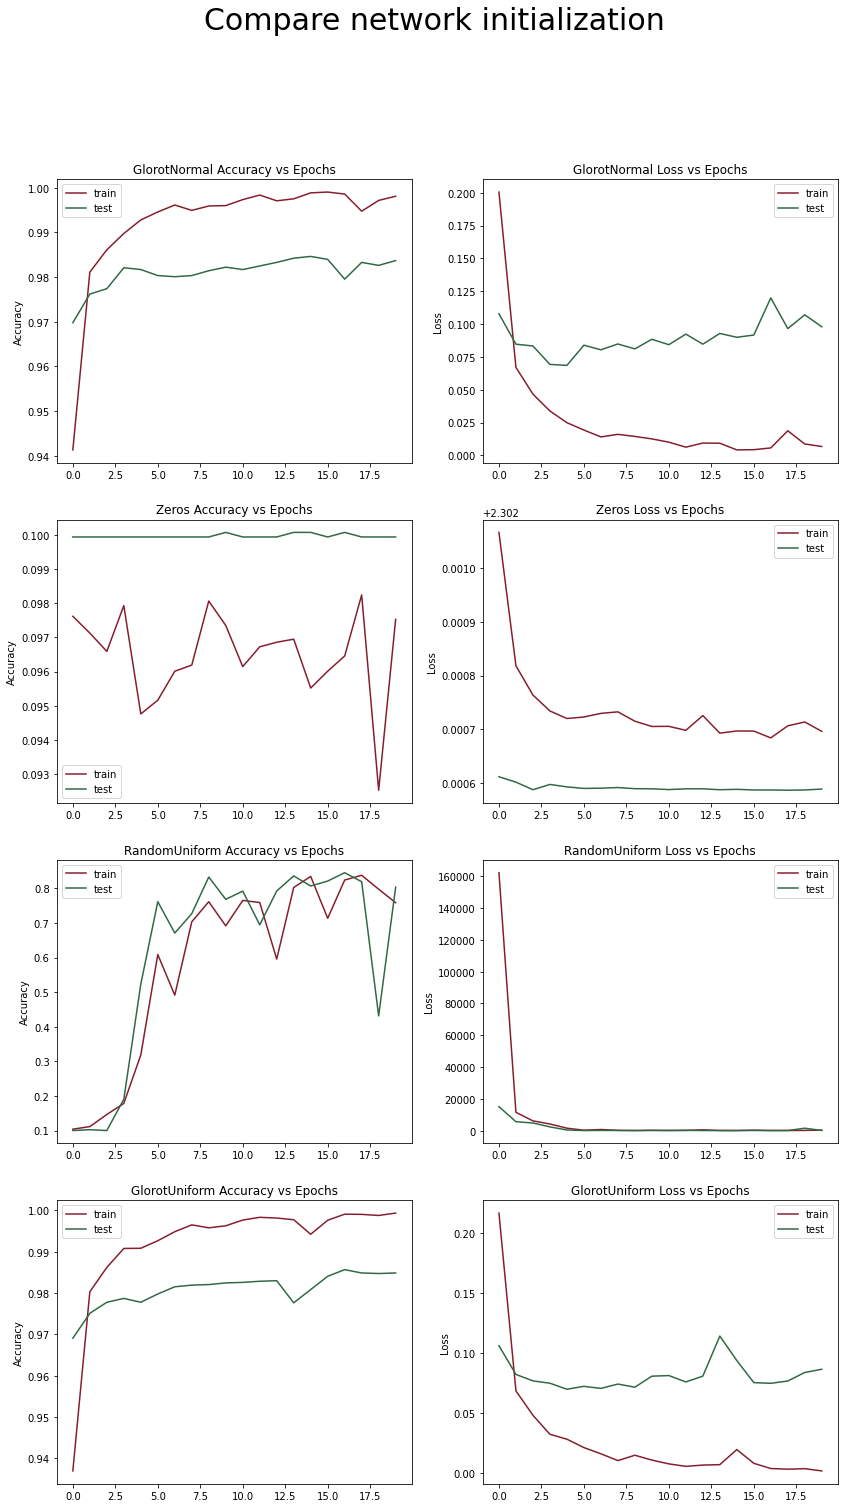

In [153]:
plt.figure(figsize=(14, 24))
plt.suptitle('Compare network initialization', fontsize=30)
plt.subplot(4,2,1)
epochs=np.arange(20)
plt.title('GlorotNormal Accuracy vs Epochs')
plt.plot(epochs,model_history2.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history2.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,2)
plt.title('GlorotNormal Loss vs Epochs')
plt.plot(epochs,model_history2.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history2.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,3)
plt.title('Zeros Accuracy vs Epochs')
plt.plot(epochs,model_history3.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history3.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,4)
plt.title('Zeros Loss vs Epochs')
plt.plot(epochs,model_history3.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history3.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,5)
plt.title('RandomUniform Accuracy vs Epochs')
plt.plot(epochs,model_history4.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history4.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,6)
plt.title('RandomUniform Loss vs Epochs')
plt.plot(epochs,model_history4.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history4.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,7)
plt.title('GlorotUniform Accuracy vs Epochs')
plt.plot(epochs,model_history5.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history5.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(4,2,8)
plt.title('GlorotUniform Loss vs Epochs')
plt.plot(epochs,model_history5.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history5.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

In [154]:
score = model.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"Baseline Accuracy:{round(score[1],8)*100}%")
score2 = model2.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"GlorotNormal Accuracy:{round(score2[1],8)*100}%")
score3 = model3.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"Zeros Accuracy:{round(score3[1],8)*100}%")
score4 = model4.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"RandomUniform Accuracy:{round(score4[1],8)*100}%")
score5 = model5.evaluate(X_test_norm,y_test_encoded, batch_size = 128,verbose = 0)
print(f"GlorotUniform Accuracy:{round(score5[1],8)*100}%")

Baseline Accuracy:98.086959%
GlorotNormal Accuracy:98.367894%
Zeros Accuracy:9.993311%
RandomUniform Accuracy:80.387962%
GlorotUniform Accuracy:98.48829500000001%


model with randomUniform initializer is fastest to plateaus, which happens in early 3 epochs, but without the highest accuracy as glorotUniform(about 98.48%).Then we can say that the network initialization is one of factors influencing the accuracy and how quickly to plateaus.<br><br>
### **Reference and Citation**
[1] https://www.kaggle.com/code/nikbearbrown/tmnist-cnn-starter<br>
[2] https://keras.io/api/layers/initializers/<br>
Code are cited from [1] and [2] with modification to experiment and answer questions.

### **License**

MIT License

Copyright (c) 2022 Yanping Fu

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.